In [4]:
import pandas as pd

In [8]:
import numpy as  np
import matplotlib.pyplot as pit
import seaborn as sns 
sns.set_theme(color_codes=True)


In [9]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [12]:
# DATA PREPROCESSING PART 1

In [14]:
#Check the numer of unique value from all the object datatype
df.select_dtypes(include='object').nunique()

Gender             2
Occupation        11
BMI Category       4
Blood Pressure    25
Sleep Disorder     3
dtype: int64

In [17]:
#DROP IDENTIFIER COLUMN LINE 'PERSON ID'
df.drop(columns= 'Person ID' , inplace=True)
df.head

<bound method NDFrame.head of      Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0      Male   27     Software Engineer             6.1                 6   
1      Male   28                Doctor             6.2                 6   
2      Male   28                Doctor             6.2                 6   
3      Male   28  Sales Representative             5.9                 4   
4      Male   28  Sales Representative             5.9                 4   
..      ...  ...                   ...             ...               ...   
369  Female   59                 Nurse             8.1                 9   
370  Female   59                 Nurse             8.0                 9   
371  Female   59                 Nurse             8.1                 9   
372  Female   59                 Nurse             8.1                 9   
373  Female   59                 Nurse             8.1                 9   

     Physical Activity Level  Stress Level BMI Category B

In [18]:
#SPLIT BLOOD PRSSURECOLUMN INTO 2 COLUMn


In [27]:
# CREATE NEW COLUMNS
df['Blood Pressure 1'] = ""
df['Blood Pressure 2'] = ""

#INTERTATE THROUGH EACH ROW
for index, row in df.iterrows():
    # Split the blood pressure value
    bp_values = row['Blood Pressure'].split('/')
    
    
    #Aesion values to the new columns 
    if len(bp_values) >= 2:
            row['Blood Pressure 1'] = bp_values[0].strip()
            row['Blood Pressure 2'] = bp_values[1].strip()


            

df.head()
            




,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure 1,Blood Pressure 2
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,,
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,,
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,,
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,,
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,,


In [28]:
# SPLIT THE 'BLOOD PRESSURE' COLUMN INTO THE SEPEARTE COLUMNS (NEW TRY)

In [39]:
df[['Blood Presuure 1', 'Blood Pressure 2']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure 1,Blood Pressure 2,Blood Presuure 1
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,,83,126
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,,80,125
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,,80,125
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,,90,140
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,,90,140


In [11]:
#DROP BLOOD PRESSURE COLUMN

df.drop(columns='Blood Pressure', inplace=True)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea


In [ ]:
CHECK BMI CATEGORY UNIQUE VALUE

In [14]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

#REPLACE "NORMAL WEIGHT' WITH 'NORMAL' in 'BMI CATEGORY' COLUMN

In [15]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight' , 'Normal')
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

CHECK OCCUPATION UNQIUE VALUE

In [16]:
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

EXPLORATORY DATA ANALYSIS

In [66]:
#List of categorical varialbles to plot
cat_vars = ['Gender', 'Occupation', 'BMI Category']

#Create figure with subplots
fig, axs =  plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axs = axs.flatten()

#Create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Sleep Disorder', data=df, ax=axs[1])
    axs[1].set_xticklabels(axs[1]).get_xticklables(), rotation=90)
    
#adjust spacing between subplots
    
fig.tight_layout()
    
    
 #SHOW PLOT
plt.show()

SyntaxError: unmatched ')' (3501632457.py, line 11)

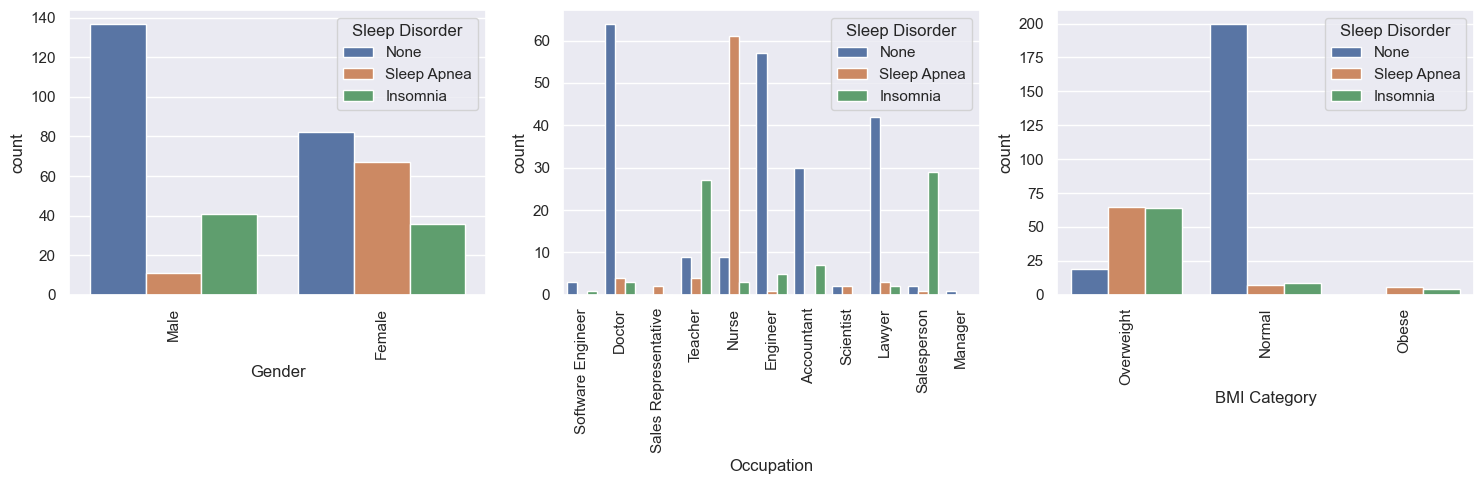

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical variables to plot
cat_vars = ['Gender', 'Occupation', 'BMI Category']

# Create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axs = axs.flatten()

# Create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Sleep Disorder', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()


In [68]:
import warnings
warnings.filterwarnings("ignore")
#get list of caterogorical variables
cat_vars = ['Gender', 'Occupation', 'BMI Category']

#create figure with subplots
fig, axs = plt.subplots(nrow=1, ncols=3, figsize=(15,5))
axs = axs.flatten()

#Create histplot for each Category variable

for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='Sleep Disorder', data=df,ax=axs[i], multiple="fill", kde=False, element="bars", fill=True stat




ValueError: Could not interpret input 'Blood Pressure 1'

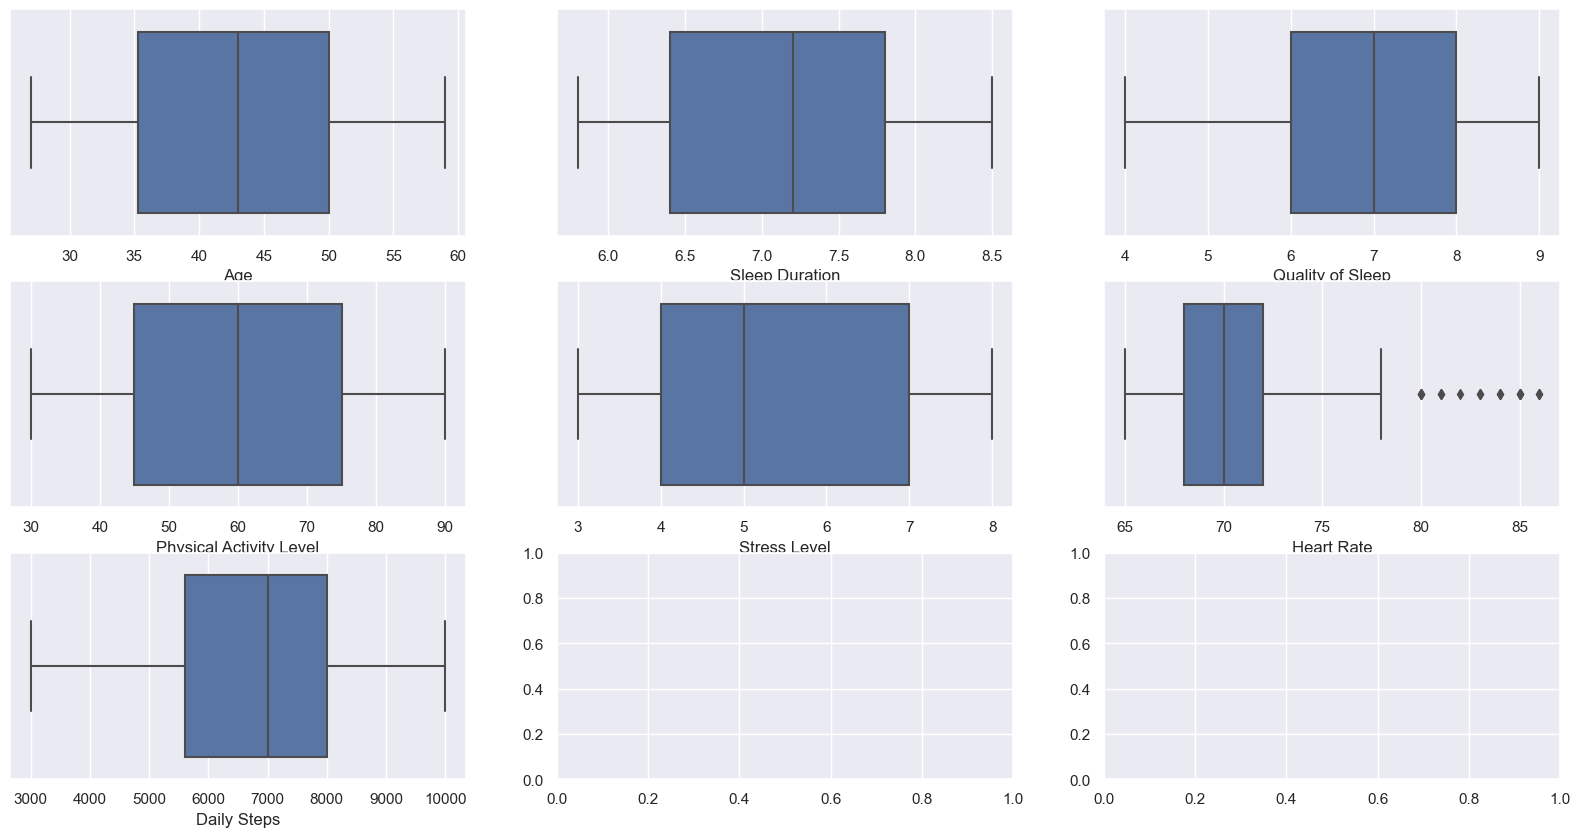

In [71]:
num_vars = ['Age','Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level','Heart Rate','Daily Steps',
            'Blood Pressure 1','Blood Pressure 2']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,10))
axs= axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])
    
fig.tight_layout()

plt.show()


ValueError: Could not interpret input 'Blood Pressure 1'

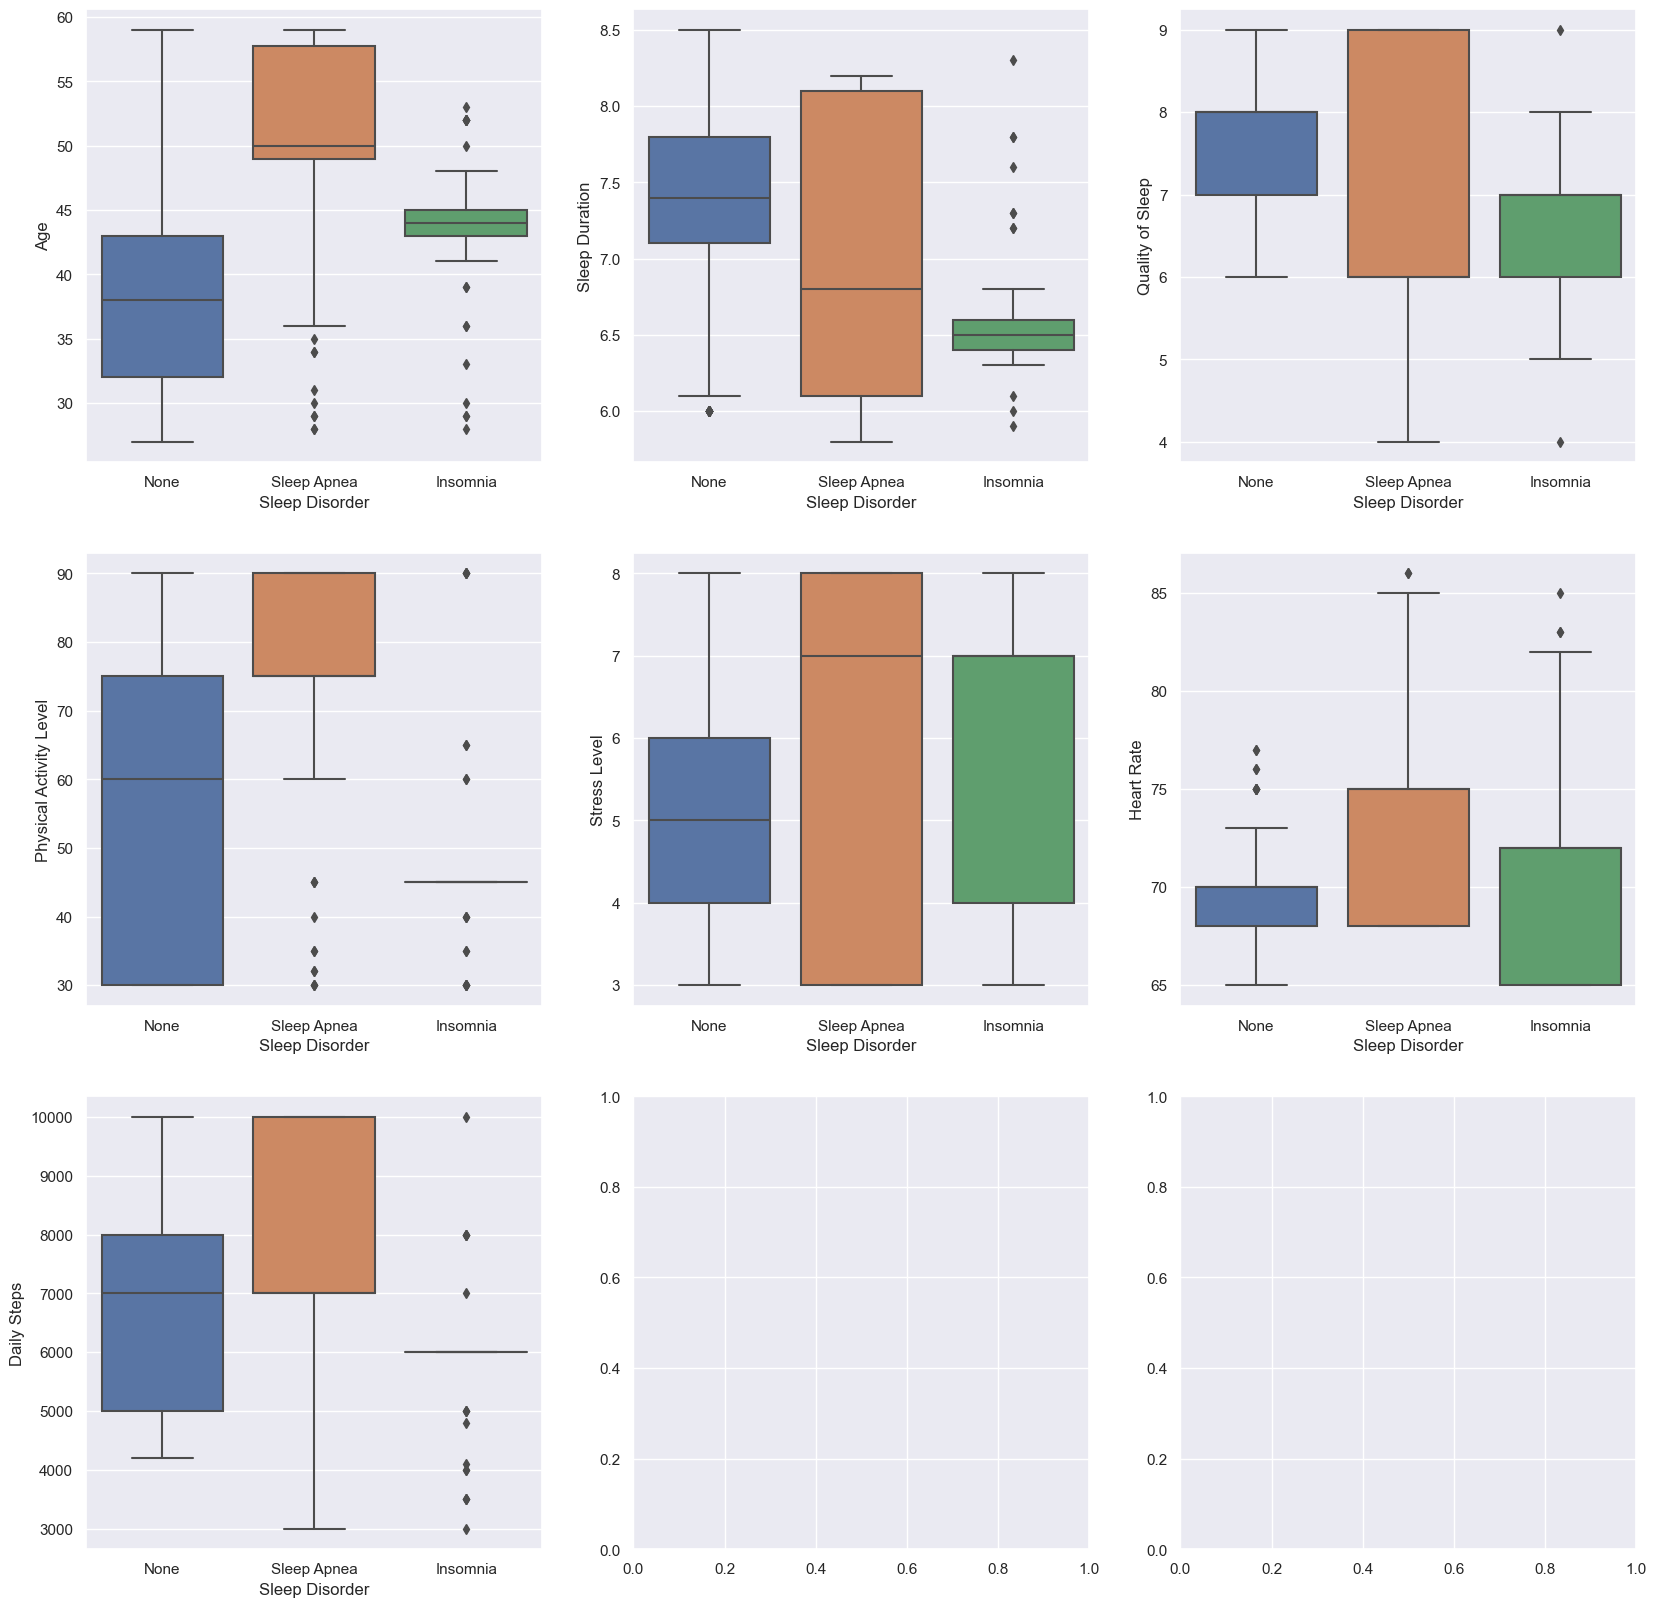

In [73]:
num_vars = ['Age','Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level','Heart Rate','Daily Steps',
            'Blood Pressure 1','Blood Pressure 2']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(y=var, x='Sleep Disorder', data=df, ax=axs[i])
    
fig.tight_layout()

plt.show()

ValueError: Could not interpret input 'Blood Pressure 1'

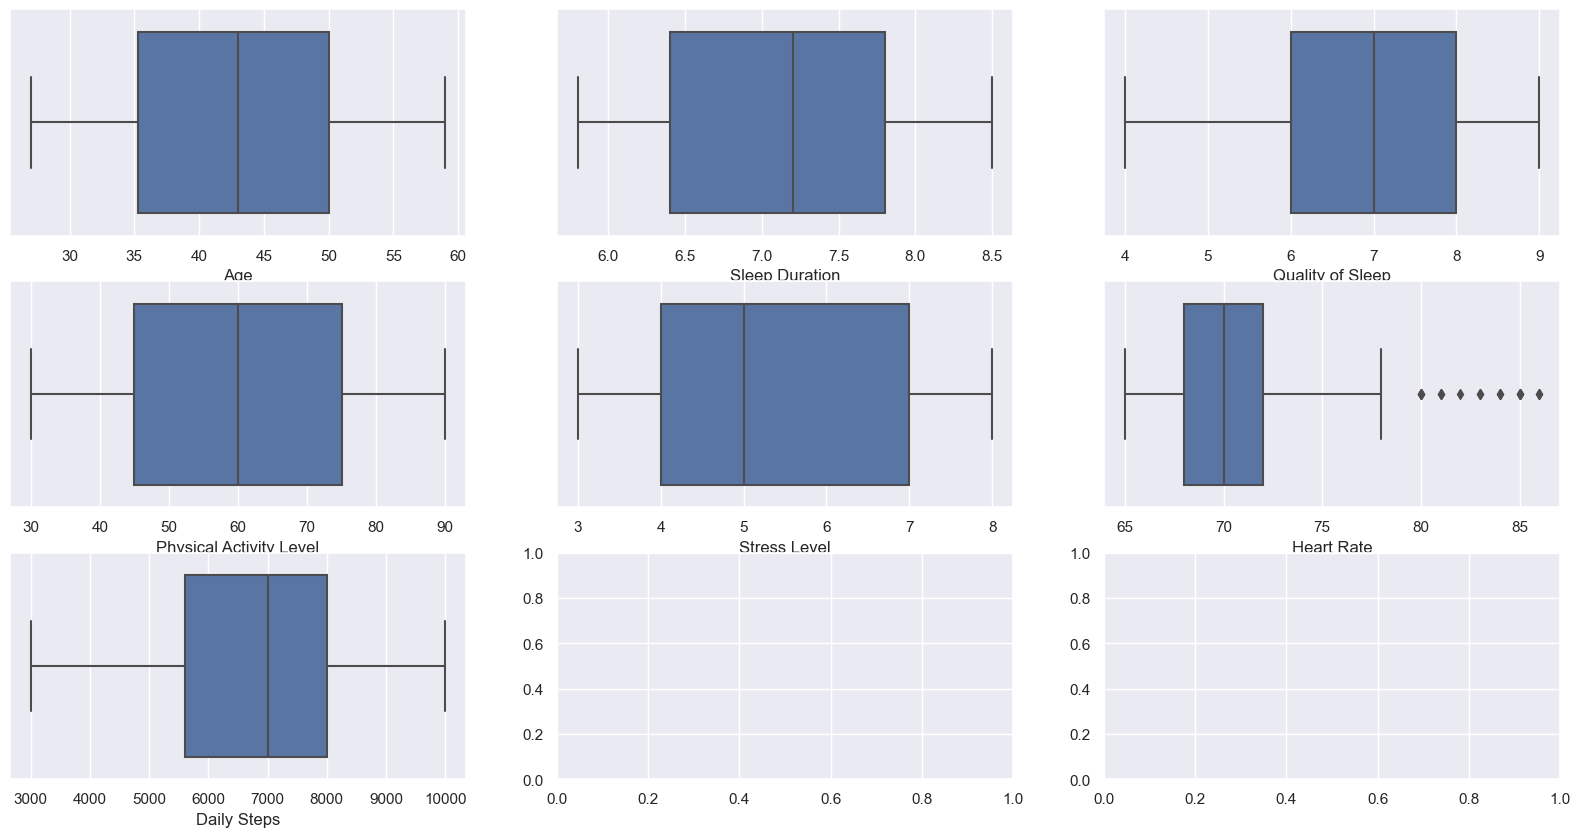

In [80]:
num_vars= ['Age', 'Sleep Duration','Quality of Sleep','Physical Activity Level',
          'Stress Level','Heart Rate','Daily Steps','Blood Pressure 1','Blood Pressure 2']

fig, axs = plt.subplots(nrows=3,ncols=3,figsize=(20,10))
axs= axs.flatten()

for i, var in enumerate(num_vars):
     sns.boxplot(x=var, data=df, ax=axs[i])
    
    
fig.tight_layout()

plt.show()

ValueError: Could not interpret input 'Blood Pressure 1'

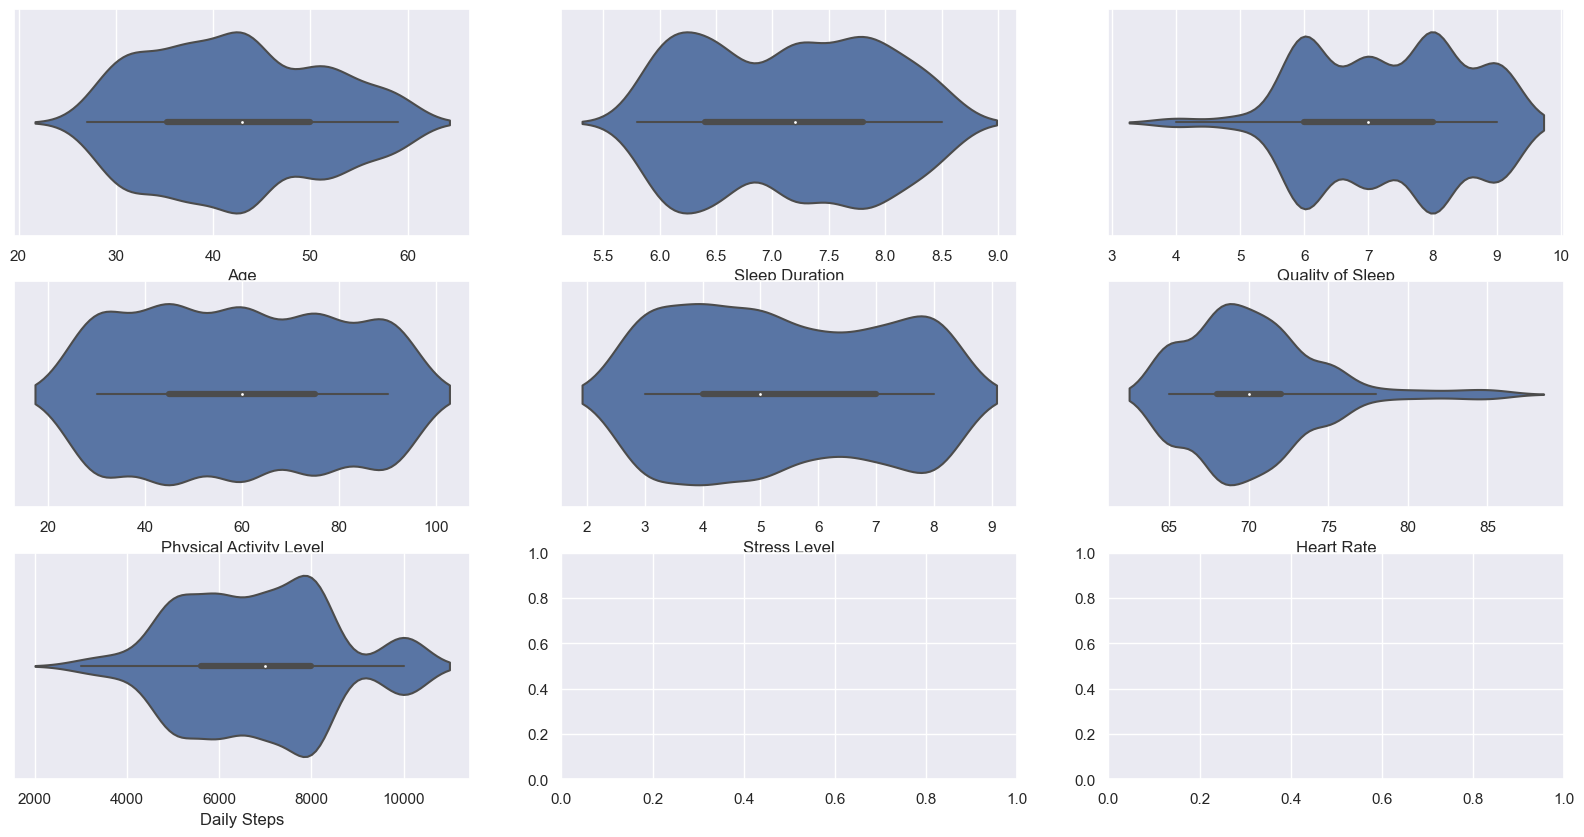

In [83]:
num_vars = num_vars= ['Age', 'Sleep Duration','Quality of Sleep','Physical Activity Level',
          'Stress Level','Heart Rate','Daily Steps','Blood Pressure 1','Blood Pressure 2']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

In [84]:
for col in df.select_dtypes(include=['object']).columns:
    
    #Print the colum nname and the unique values
    print(f"{col}:  {df[col].unique()}")

Gender:  ['Male' 'Female']
Occupation:  ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI Category:  ['Overweight' 'Normal' 'Obese']
Sleep Disorder:  ['None' 'Sleep Apnea' 'Insomnia']


In [89]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a label encoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")


Gender: [1 0]
Occupation: [ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category: [2 0 1]
Sleep Disorder: [1 2 0]


#CORRELATION HEATMAP


<Axes: >

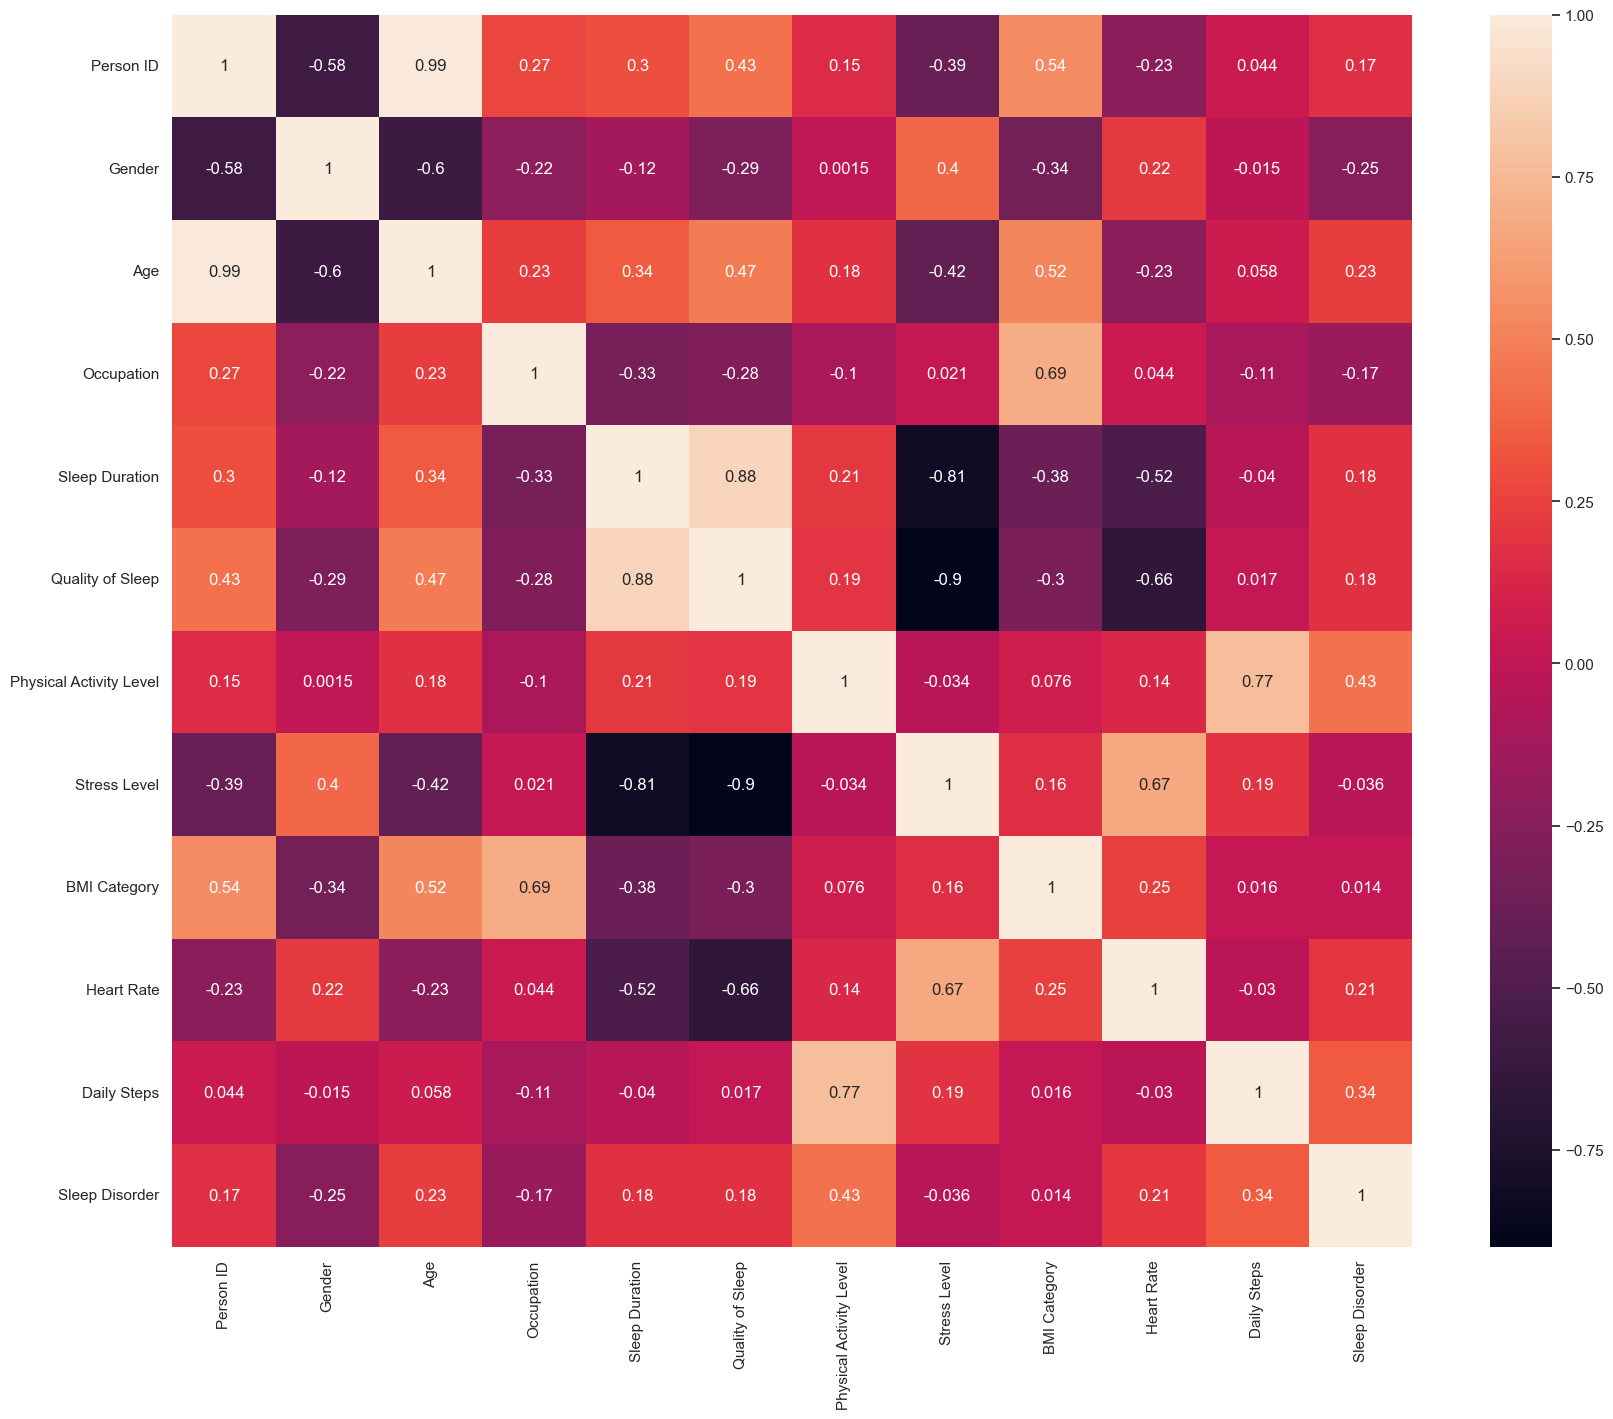

In [109]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

In [ ]:
from scripy import stats

selected_columns = ['Age', 'NumofProducts','CreditScore']

z_scores = np.abs(stats.zscore(x_train[selected_columns]))
